In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv('..\data\predictive_maintenance_train_resampled.csv')
df_test = pd.read_csv('..\data\predictive_maintenance_test_resampled.csv')
df_val = pd.read_csv('..\data\predictive_maintenance_validation.csv')

In [8]:
name_target_col = list(filter(lambda ligne: 'Failure' in ligne, df_train.columns))
X_train = df_train.drop(columns=name_target_col).to_numpy()
y_train = df_train[name_target_col]
X_test = df_test.drop(columns=name_target_col).to_numpy()
y_test = df_test[name_target_col]
X_val = df_val.drop(columns=name_target_col).to_numpy()
y_val = df_val[name_target_col]

In [9]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
y_val = np.argmax(y_val, axis=1)

In [11]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = log_reg.predict(X_val)

In [15]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_pred)
cm

array([[1927,    2],
       [  54,   12]], dtype=int64)

Text(50.722222222222214, 0.5, 'True label')

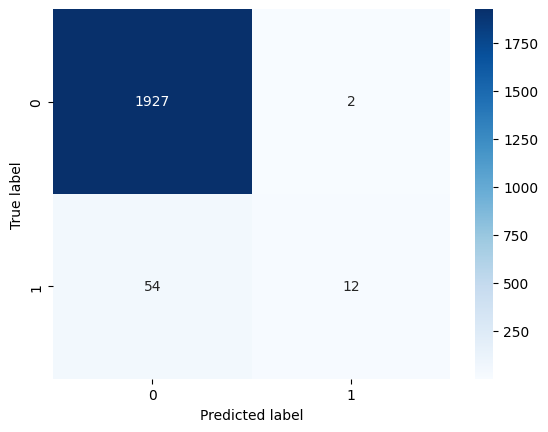

In [17]:
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt=".0f")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')